# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from consav import elapsed

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig, vary_par, IRF_figs

# Setup

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load_parameters('calibration')
model.load_data()

In [3]:
model.find_ss()
model.compute_jacs()
model.find_transition_path()

In [4]:
SAM = FullHANKSAMModelClass(name='baseline')
SAM.load_parameters('calibration')
SAM.load_data()

# Wage level vs wage rigidity

In [5]:
SAM.par.wage_setting = 'rule'
SAM.set_only_SAM()

In [6]:
SAM.find_ss()

In [7]:
values = [0.0,-0.01,-0.02]

baseline: eta_u = 0.0000
eta_u =  0.0000
eta_u = -0.0100
eta_u = -0.0200
completed in 36.1 secs


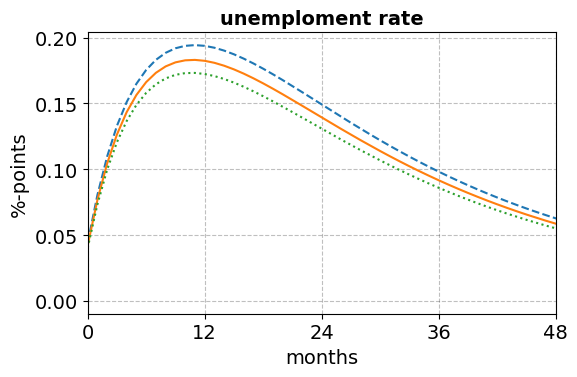

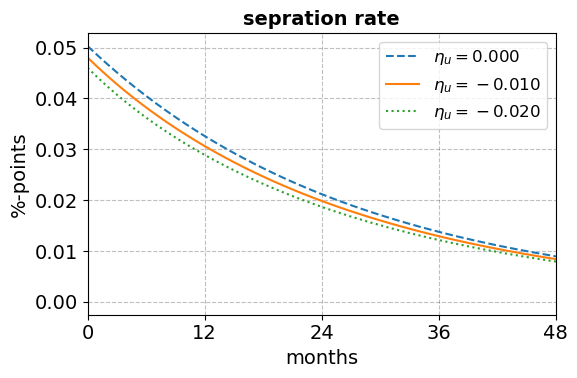

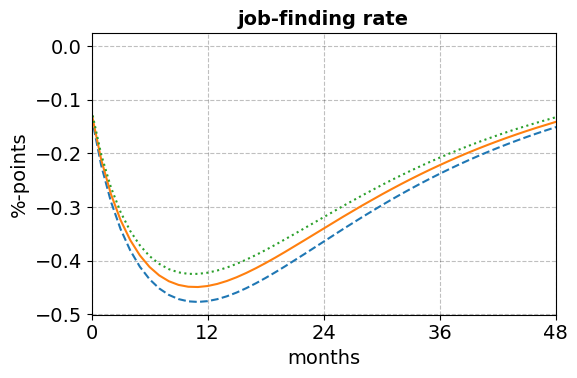

In [8]:
shock_specs={'px':model.path.px[0,:],'shock_TFP':model.path.shock_TFP[0,:]}
for parname,labelname in [('eta_u','\eta_u')]:
    
    models = vary_par(SAM,parname,values,skip_hh=True,shock_specs=shock_specs,do_print=True)
                          
    labels = [f'${labelname} = {model_.par.__dict__[parname]:.3f}$' for model_ in models]
    lss = ['--','-',':']

    for varname,title in [('u','unemploment rate'),('delta','sepration rate'),('lambda_u','job-finding rate')]:
        IRF_figs(models,labels,lss,colors,title,'SAM',parname,varname,legend=varname=='delta',T_max=48)
    
    plt.show()

In [9]:
for eta_u in [0.0,-0.001,-0.005,-0.01,-0.02,-0.04]:
    
    SAM.par.eta_u = eta_u
    print(f'{eta_u = :.3f}')
    
    for w_ss in (1-0.5**np.arange(1,10))*SAM.ss.px:
    
        SAM.par.w_ss = w_ss
        
        try:
            
            SAM.find_ss()
            SAM.compute_jacs(skip_hh=True,skip_shocks=True)
            SAM.find_transition_path(do_end_check=False)
            SAM.calc_calib_moms()

            print(f' {w_ss = :.4f}: var_u = {SAM.moms["var_u"]:.2f}')
            
        except:
            
            break


eta_u = 0.000
 w_ss = 0.4167: var_u = 0.12
 w_ss = 0.6250: var_u = 0.64
 w_ss = 0.7292: var_u = 3.90
 w_ss = 0.7812: var_u = 26.79
 w_ss = 0.8073: var_u = 187.88
 w_ss = 0.8203: var_u = 1130.51
 w_ss = 0.8268: var_u = 3310.05
eta_u = -0.001
 w_ss = 0.4167: var_u = 0.12
 w_ss = 0.6250: var_u = 0.63
 w_ss = 0.7292: var_u = 3.78
 w_ss = 0.7812: var_u = 24.37
 w_ss = 0.8073: var_u = 144.96
 w_ss = 0.8203: var_u = 678.72
 w_ss = 0.8268: var_u = 1625.47
 w_ss = 0.8301: var_u = 2586.57
eta_u = -0.005
 w_ss = 0.4167: var_u = 0.12
 w_ss = 0.6250: var_u = 0.61
 w_ss = 0.7292: var_u = 3.37
 w_ss = 0.7812: var_u = 17.55
 w_ss = 0.8073: var_u = 68.81
 w_ss = 0.8203: var_u = 189.16
 w_ss = 0.8268: var_u = 349.93
 w_ss = 0.8301: var_u = 471.54
 w_ss = 0.8317: var_u = 547.83
eta_u = -0.010
 w_ss = 0.4167: var_u = 0.12
 w_ss = 0.6250: var_u = 0.58
 w_ss = 0.7292: var_u = 2.94
 w_ss = 0.7812: var_u = 12.60
 w_ss = 0.8073: var_u = 37.27
 w_ss = 0.8203: var_u = 77.46
 w_ss = 0.8268: var_u = 125.05
 w_ss =